In [17]:
""" Student Course Feedback & Satisfaction Analysis

This project analyzes structured student feedback collected through numerical ratings. The goal is to evaluate overall student satisfaction, identify strengths and improvement areas,and provide actionable recommendations to improve course quality.
"""

"""Load the Dataset

The dataset contains student feedback in the form of numerical ratings across multiple evaluation parameters."""

import pandas as pd

df = pd.read_csv("student_feedback.csv")
df.head()
#shows first 5 rows

# Dataset Overview
df.shape
df.columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Unnamed: 0                                            1001 non-null   int64
 1   Student ID                                            1001 non-null   int64
 2   Well versed with the subject                          1001 non-null   int64
 3   Explains concepts in an understandable way            1001 non-null   int64
 4   Use of presentations                                  1001 non-null   int64
 5   Degree of difficulty of assignments                   1001 non-null   int64
 6   Solves doubts willingly                               1001 non-null   int64
 7   Structuring of the course                             1001 non-null   int64
 8   Provides support for students going above and beyond  1001 non-null   int64
 9

In [18]:
import pandas as pd
df = pd.read_csv("student_feedback.csv")
# Data Cleaning- removing unnecessary columns
df = df.drop(columns=["Unnamed: 0"])

# Identifying Feedback Parameters
rating_cols = df.columns[1:]  # excluding Student ID
rating_cols


Index(['Well versed with the subject',
       'Explains concepts in an understandable way', 'Use of presentations',
       'Degree of difficulty of assignments', 'Solves doubts willingly',
       'Structuring of the course',
       'Provides support for students going above and beyond',
       'Course recommendation based on relevance'],
      dtype='object')

In [19]:
"""Overall Student Satisfaction Score

We calculate an overall satisfaction score by averaging all feedback parameters for each student."""

df['Overall_Satisfaction'] = df[rating_cols].mean(axis=1)
df[['Student ID', 'Overall_Satisfaction']].head()


,Student ID,Overall_Satisfaction
0,340,5.000
1,253,4.875
2,680,4.375
3,806,5.875
4,632,7.500


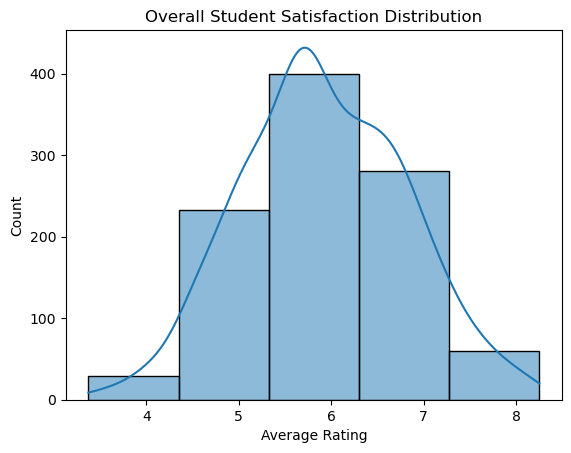

In [9]:
# Distribution of Overall Satisfaction
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Overall_Satisfaction'], bins=5, kde=True)
plt.title("Overall Student Satisfaction Distribution")
plt.xlabel("Average Rating")
plt.show()
#answers- are student guinenly satisfied



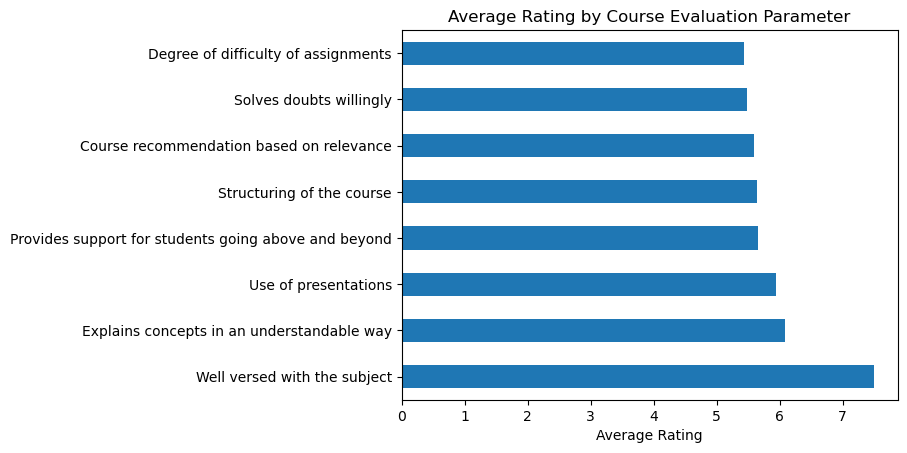

In [11]:
# Average Rating by Evaluation Parameter
#This helps identify strengths and weaknesses of the course.

avg_scores = df[rating_cols].mean().sort_values(ascending=False)
avg_scores.plot(kind='barh')
plt.title("Average Rating by Course Evaluation Parameter")
plt.xlabel("Average Rating")
plt.show()


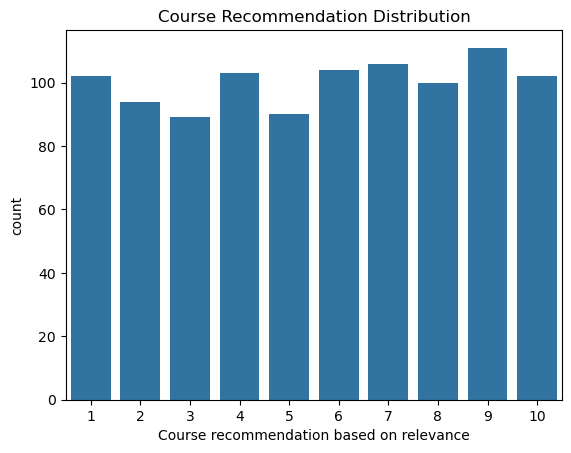

In [20]:
strong_areas = avg_scores[avg_scores >= 4.0]
weak_areas = avg_scores[avg_scores < 3.5]
#set threshold


# Course Recommendation Analysis
sns.countplot(x='Course recommendation based on relevance', data=df)
plt.title("Course Recommendation Distribution")
plt.show()


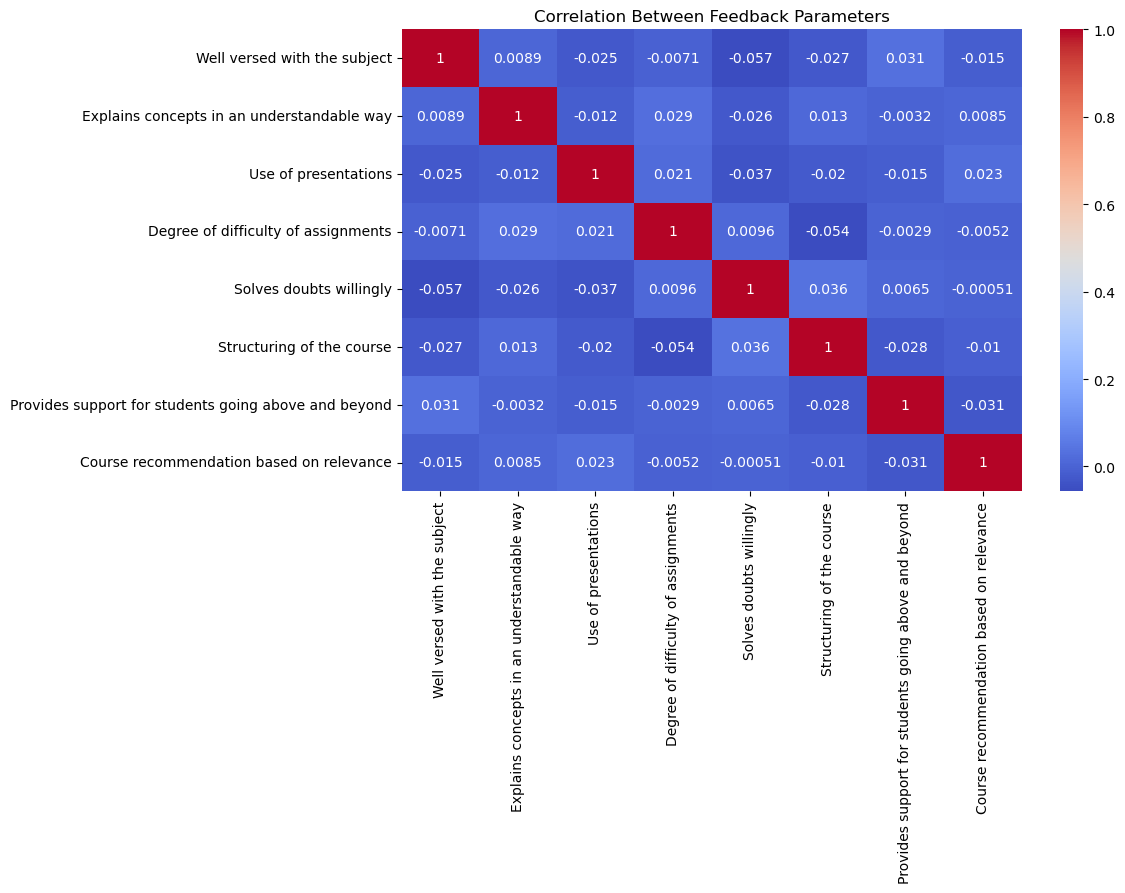

In [16]:
# Correlation Between Feedback Parameters

plt.figure(figsize=(10,6))
sns.heatmap(df[rating_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Feedback Parameters")
plt.show()


In [ ]:
"""Key Insights
Students rate subject knowledge and concept clarity highly
Assignment difficulty shows relatively lower satisfaction
Overall satisfaction is consistently above average
Course recommendation correlates strongly with teaching clarity"""

"""Actionable Recommendations
Simplify assignment difficulty or provide more guidance
Maintain strong conceptual explanations
Increase student support initiatives
Use periodic feedback to track improvements"""